<a href="https://colab.research.google.com/github/yasminbottan/estudo-descritivo-formula1/blob/main/Projeto_Formula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BIBLIOTECAS, FONTES E BASE DE DADOS**

In [1]:
# manipulação de dados
import pandas as pd
import numpy as np

# visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# utilização de fonte personalizada
from matplotlib.font_manager import FontProperties as fp

In [2]:
# Carregar a fonte personalizada
font_f1_regular = '/content/Formula1-Bold_web_0.ttf'
f1_regular = fp(fname=font_f1_regular)

font_f1_italic = '/content/Formula1-Regular_web_0.ttf'
f1_italic = fp(fname=font_f1_italic)

font_f1_bold = '/content/Formula1-Wide_web_0.ttf'
f1_bold = fp(fname=font_f1_bold)

In [3]:
# Carregar base de dados

constructor_results = pd.read_csv('constructor_results.csv', encoding='latin1', delimiter=',')
constructors = pd.read_csv('constructors.csv', encoding='latin1', delimiter=',')
drivers = pd.read_csv('drivers.csv', encoding='latin1', delimiter=',')
races = pd.read_csv('races.csv', encoding='latin1', delimiter=',')
results = pd.read_csv('results.csv', encoding='latin1', delimiter=',')
sprint_results = pd.read_csv('sprint_results.csv', encoding='latin1', delimiter=',')

# **COLUMNS DESCRIBE**

**TABELAS DIMENSÃO:**


* **constructors** ['constructorId', 'constructorRef', 'name', 'nationality']
* **drivers** ['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob', 'nationality']
* **races** ['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time','fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time','quali_date', 'quali_time', 'sprint_date', 'sprint_time']


**TABELAS FATO:**

* **constructor_results** ['constructorResultsId', 'raceId', 'constructorId','points', 'status']
* **results** ['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid', 'position', 'positionText', 'positionOrder', 'points', 'laps', 'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId']
* **sprint_results** ['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid', 'position', 'positionText', 'positionOrder', 'points', 'laps', 'time', 'milliseconds', 'fastestLap', 'fastestLapTime', 'statusId']

# **PONTOS DOS PILOTOS**

In [4]:
# Junção das bases
results_drivers = pd.merge(results, drivers, on='driverId', how='left')
results_drivers_race = pd.merge(results_drivers, races, on='raceId', how='left')

# FINALIDADE: trazer nome dos pilotos e trazer os anos das temporadas

In [5]:
# Verificação das informações da tabela
results_drivers_race.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,18,2,2,3,5,2,2,2,8.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,18,3,3,7,7,3,3,3,6.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,18,4,4,5,11,4,4,4,5.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,18,5,1,23,3,5,5,5,4.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [6]:
# Verificando formato da base criada
results_drivers_race.shape

(26519, 43)

In [7]:
# Verificando nomes das colunas contidas na tabela criada
results_drivers_race.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number_x', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_x',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'number_y', 'code',
       'forename', 'surname', 'dob', 'nationality', 'url_x', 'year', 'round',
       'circuitId', 'name', 'date', 'time_y', 'url_y', 'fp1_date', 'fp1_time',
       'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date',
       'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

In [8]:
# Filtrando pelo ano 2023
results_drivers_2023 = results_drivers_race[results_drivers_race['year'] == 2023]

# Selecionando apenas as colunas desejadas no estudo
results_drivers_2023 = results_drivers_2023[['code', 'points']]
results_drivers_2023.head()

,code,points
25840,VER,25.0
25841,PER,18.0
25842,ALO,15.0
25843,SAI,12.0
25844,HAM,10.0


In [9]:
# Somando e agrupando todos os pontos por código dos piloltos
results_drivers_2023_tt = results_drivers_2023.groupby(['code'])[['points']].sum().reset_index()
results_drivers_2023_tt.head()

,code,points
0,ALB,25.0
1,ALO,198.0
2,BOT,10.0
3,DEV,0.0
4,GAS,54.0


In [10]:
# Ordenando os pilotos pela maior pontuação
results_total_drivers = results_drivers_2023_tt.sort_values(by='points', ascending=False)

In [11]:
# Criando uma mapa por piloto de acordo com as cores de suas equipe da temporada de 2023
driver_color_map = {
    'VER': 'MidnightBlue',
    'PER': 'MidnightBlue',
    'LEC': 'red',
    'SAI': 'red',
    'ALO': 'DarkCyan',
    'STR': 'DarkCyan',
    'HAM': 'aqua',
    'RUS': 'aqua',
    'NOR': 'DarkOrange',
    'PIA': 'DarkOrange',
    'OCO': 'HotPink',
    'GAS': 'HotPink',
    'ALB': 'RoyalBlue',
    'TSU': 'SteelBlue',
    'BOT': 'FireBrick',
    'RIC': 'SteelBlue',
    'HUL': 'black',
    'ZHO': 'FireBrick',
    'MAG': 'black',
    'LAW': 'SteelBlue',
    'SAR': 'RoyalBlue',
    'DEV': 'SteelBlue'
}

In [12]:
# Adicionando uma coluna de cores baseadas no color map
results_total_drivers['color'] = results_total_drivers['code'].map(driver_color_map)

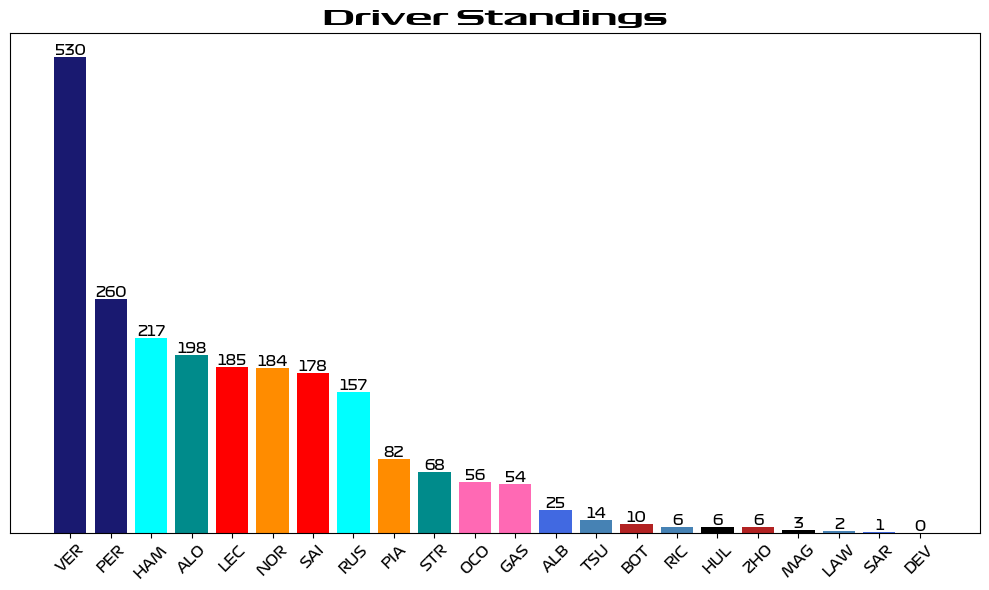

In [13]:
# Plotando o gráfico de barras

plt.figure(figsize=(10,6))

bars_drivers = plt.bar(results_total_drivers['code'], results_total_drivers['points'], color=results_total_drivers['color']) # utilizamos a cor mapeada
plt.title('Driver Standings', fontproperties=f1_bold, fontsize=14)
plt.xticks(rotation=45, fontproperties=f1_italic, fontsize=10)
plt.yticks([]) # eixo y sem descrição

for bar in bars_drivers:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom', fontproperties=f1_italic, fontsize=10)
# adicionar o rótulo de dados centralizado com cada barra

plt.tight_layout() # ajustar conforme tamanho estabelecido
plt.show()

**Análise Gráfica**

É possível observar que o piloto Verstappen venceu a temporada com uma diferença disparada de 270 pontos, praticamente o dobro da pontuação do segundo colocado.

Do 2º até o 7º colocado, houveram algumas disputas sendo a principal entre Leclerc e Noris. Neste ponto é notório que temos muitos pilotos qualificados para disputa do título quando excluimos o Verstappen do quadro de pontos.

Os pilotos Lawson e Devries participaram apenas para substituir outros pilotos oficiais, portanto não tiveram grandes pontuações.

# **PONTOS DOS PILOTOS SPINT RACE**

In [14]:
# Junção das bases
results_sprints = pd.merge(sprint_results, drivers, on='driverId', how='left')
results_sprints_race = pd.merge(results_sprints, races, on='raceId', how='left')

# FINALIDADE: trazer nome dos pilotos e trazer os anos das temporadas

In [15]:
# Verificação das informações da tabela
results_sprints_race.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,1061,830,9,33,2,1,1,1,3,...,2021-07-16,\N,2021-07-17,\N,\N,\N,2021-07-16,\N,2021-07-17,\N
1,2,1061,1,131,44,1,2,2,2,2,...,2021-07-16,\N,2021-07-17,\N,\N,\N,2021-07-16,\N,2021-07-17,\N
2,3,1061,822,131,77,3,3,3,3,1,...,2021-07-16,\N,2021-07-17,\N,\N,\N,2021-07-16,\N,2021-07-17,\N
3,4,1061,844,6,16,4,4,4,4,0,...,2021-07-16,\N,2021-07-17,\N,\N,\N,2021-07-16,\N,2021-07-17,\N
4,5,1061,846,1,4,6,5,5,5,0,...,2021-07-16,\N,2021-07-17,\N,\N,\N,2021-07-16,\N,2021-07-17,\N


In [16]:
# Verificando nomes das colunas contidas na tabela criada
results_sprints_race.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number_x', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_x',
       'milliseconds', 'fastestLap', 'fastestLapTime', 'statusId', 'driverRef',
       'number_y', 'code', 'forename', 'surname', 'dob', 'nationality',
       'url_x', 'year', 'round', 'circuitId', 'name', 'date', 'time_y',
       'url_y', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date',
       'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

In [17]:
# Filtrando pelo ano 2023
results_sprints_2023 = results_sprints_race[results_sprints_race['year'] == 2023]

# Selecionando apenas as colunas desejadas no estudo
results_sprints_2023 = results_sprints_2023[['code', 'points']]
results_sprints_2023.head()

,code,points
120,PER,8
121,LEC,7
122,VER,6
123,RUS,5
124,SAI,4


In [18]:
# Somando e agrupando todos os pontos por código dos piloltos
results_sprints_2023_tt = results_sprints_2023.groupby(['code'])[['points']].sum().reset_index()
results_sprints_2023_tt.head()

,code,points
0,ALB,2
1,ALO,8
2,BOT,0
3,DEV,0
4,GAS,8


In [19]:
# Ordenando os pilotos pela maior pontuação
results_total_sprint = results_sprints_2023_tt.sort_values(by='points', ascending=False)

In [20]:
# Adicionando uma coluna de cores baseadas no color map
results_total_sprint['color'] = results_total_sprint['code'].map(driver_color_map)

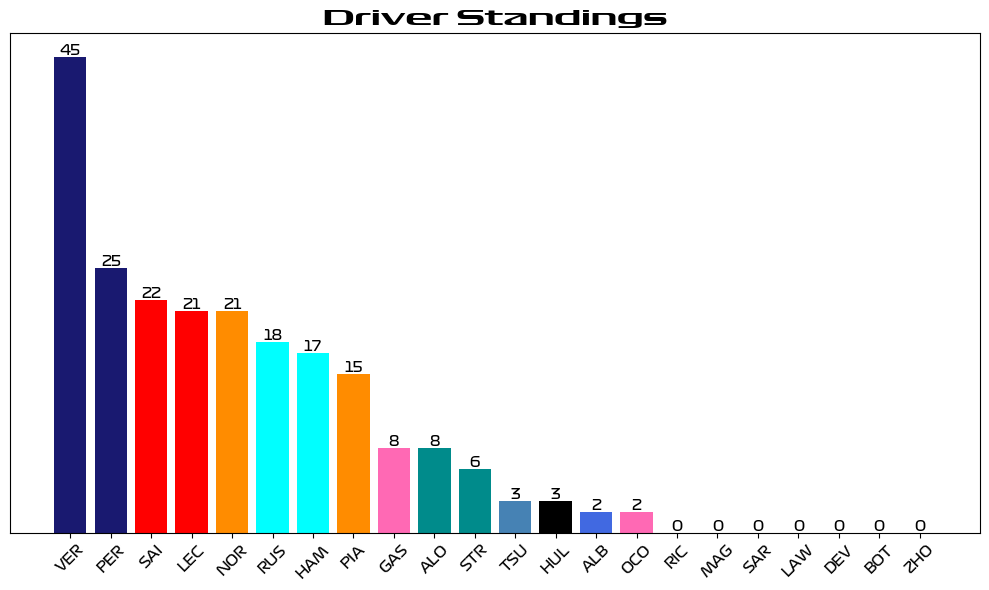

In [21]:
# Plotando o gráfico de barras

plt.figure(figsize=(10,6))

bars_drivers = plt.bar(results_total_sprint['code'], results_total_sprint['points'], color=results_total_sprint['color']) # utilizamos cores mapeadas
plt.title('Driver Standings', fontproperties=f1_bold, fontsize=14)
plt.xticks(rotation=45, fontproperties=f1_italic, fontsize=10)
plt.yticks([]) # eixo y sem descrição

for bar in bars_drivers:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom', fontproperties=f1_italic, fontsize=10)
# adicionando rótulo de dados centralizado com cada barra

plt.tight_layout() # ajustar gráfico no tamanho pré determidado
plt.show()

**Análise Gráfica**

É possível observar que o piloto Verstappen fez, praticamente, o dobro da pontuação do segundo colocado na pontuação das sprints races.

O resultado do 2º até o 7º colocado ficaram bem parelhos, sendo que os pilotos Leclerc e Noris ficaram empatados. Neste gráfico é notório que as equipes Red Bull, Ferrari e Mercedes tem exelente performance nas sprints races, assim como nas races oficiais.

Os pilotos Lawson e Devries participaram apenas para substituir outros pilotos oficiais, e por fim, não tiveram pontuações nas sprints races.

# **PONTOS DOS CONSTRUTORES**


In [22]:
# Junção das bases
results_constructor = pd.merge(constructor_results, constructors, on='constructorId', how='left')
results_constructor_race = pd.merge(results_constructor, races, on='raceId', how='left')

# FINALIDADE: trazer nome dos construtores e trazer os anos das temporadas

In [23]:
# Verificação das informações da tabela
results_constructor_race.head()

,constructorResultsId,raceId,constructorId,points,status,constructorRef,name_x,nationality,url_x,year,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,18,1,14.0,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,2008,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,18,2,8.0,\N,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,2008,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,18,3,9.0,\N,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,2008,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,18,4,5.0,\N,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,2008,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,18,5,2.0,\N,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,2008,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [24]:
# Verificando nomes das colunas contidas na tabela criada
results_constructor_race.columns

Index(['constructorResultsId', 'raceId', 'constructorId', 'points', 'status',
       'constructorRef', 'name_x', 'nationality', 'url_x', 'year', 'round',
       'circuitId', 'name_y', 'date', 'time', 'url_y', 'fp1_date', 'fp1_time',
       'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date',
       'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

In [25]:
# Filtrando pelo ano 2023
results_constructor_2023 = results_constructor_race[results_constructor_race['year'] == 2023]

# Selecionando apenas as colunas desejadas no estudo
results_constructor_2023 = results_constructor_2023[['name_x', 'points']]
results_constructor_2023.head()

,name_x,points
10306,Ferrari,18.0
10307,Red Bull,38.0
10485,McLaren,18.0
10486,Mercedes,17.0
12169,Red Bull,43.0


In [26]:
# Somando e agrupando todos os pontos por código dos construtores
results_constructor_2023_tt = results_constructor_2023.groupby(['name_x'])[['points']].sum().reset_index()
results_constructor_2023_tt.head()

,name_x,points
0,Alfa Romeo,16.0
1,AlphaTauri,25.0
2,Alpine F1 Team,120.0
3,Aston Martin,280.0
4,Ferrari,406.0


In [27]:
# Ordenando os construtores pela maior pontuação
results_total_constructors = results_constructor_2023_tt.sort_values(by='points', ascending=False)
results_total_constructors.head()

,name_x,points
8,Red Bull,860.0
7,Mercedes,409.0
4,Ferrari,406.0
6,McLaren,302.0
3,Aston Martin,280.0


In [28]:
# Criando uma mapa por construtor da temporada de 2023
constructor_color_map = {
    'Red Bull': 'MidnightBlue',
    'Ferrari': 'red',
    'Mercedes': 'aqua',
    'Alpine F1 Team': 'HotPink',
    'McLaren': 'DarkOrange',
    'Alfa Romeo': 'FireBrick',
    'Aston Martin': 'DarkCyan',
    'Haas F1 Team': 'black',
    'AlphaTauri': 'SteelBlue',
    'Williams': 'RoyalBlue'
}


In [29]:
# Adicionando uma coluna de cores baseadas no color map
results_total_constructors['color'] = results_total_constructors['name_x'].map(constructor_color_map)

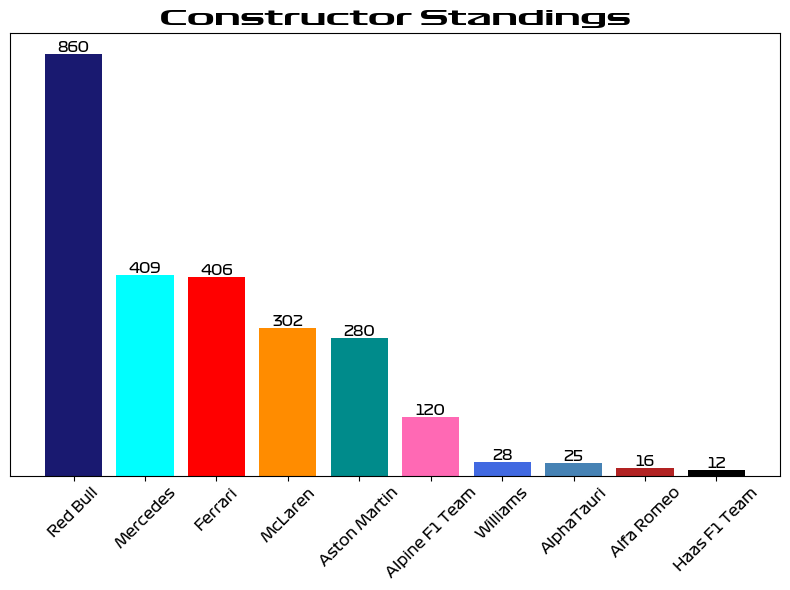

In [30]:
# Plotando o gráfico de barras

plt.figure(figsize=(8,6))

bars_constructors = plt.bar(results_total_constructors['name_x'], results_total_constructors['points'], color=results_total_constructors['color']) # utilizando cores mapeadas
plt.title('Constructor Standings', fontproperties=f1_bold, fontsize=14)
plt.xticks(rotation=45, fontproperties=f1_italic, fontsize=10)
plt.yticks([]) # eixo y sem descrição

for bar in bars_constructors:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom', fontproperties=f1_italic, fontsize=10)
# adicionando os rótulos centralizados com as barras

plt.tight_layout() # ajustando gráfico dentro do tamanho estabelecido
plt.show()


**Análise Gráfica**

É possível observar que a equipe Red Bull ganhou de forma disparada a temporada de 2023, restando apenas a disputa pelo 2º lugar que foi concorrida até a última corrida da temporada.

As equipes Alfa Romeo e Hass, infelizmente não tiveram boas performances.
Lembrando que o piloto Mazepin foi obrigado a se retirar da temporada devido sua nacionalidade ser russa e seu pai (investidor da Hass) apoiar a guerra da Rússia contra Ucrânia.

# **PILOTOS COM MELHORES CLASSIFICAÇÕES PARA O GRID DE LARGADA**


In [31]:
# Utilizamos base de resultado dos pilotos já construida anteriormente para esse estudo

# Filtrando pelo ano 2023
grid_drivers_2023 = results_drivers_race[results_drivers_race['year'] == 2023]

# Selecionando apenas as colunas desejadas no estudo
grid_drivers_2023 = grid_drivers_2023[['code', 'grid']]

In [32]:
# Contar a quantidade de vezes que cada piloto ocupou cada posição no grid
grid_drivers_2023 = grid_drivers_2023[['code', 'grid']]
grid_counts = grid_drivers_2023.groupby(['code', 'grid']).size().unstack(fill_value=0)

In [33]:
# Ordenar os pilotos pela quantidade de vezes que ocuparam a primeira posição no grid
sort_cols = list(range(1, 21))
grid_counts = grid_counts.sort_values(by=sort_cols, ascending=[False]*20)

# Selecionar apenas as colunas dos grids de 1 a 20
grid_counts_largada = grid_counts[range(1, 21)]

In [34]:
# verificando base criada
grid_counts_largada.head()

grid,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
code,,,,,,,,,,,,,,,,,,,,
VER,12,4,1,0,0,2,0,0,1,0,1,0,0,0,1,0,0,0,0,0
LEC,5,2,3,2,1,2,2,0,1,1,0,1,0,0,0,0,0,0,1,0
SAI,2,2,2,6,2,2,1,0,0,0,2,2,0,0,0,1,0,0,0,0
PER,2,2,1,0,3,0,1,0,4,0,2,1,1,0,2,0,0,0,0,1
HAM,1,0,5,1,5,1,4,1,0,1,1,0,2,0,0,0,0,0,0,0


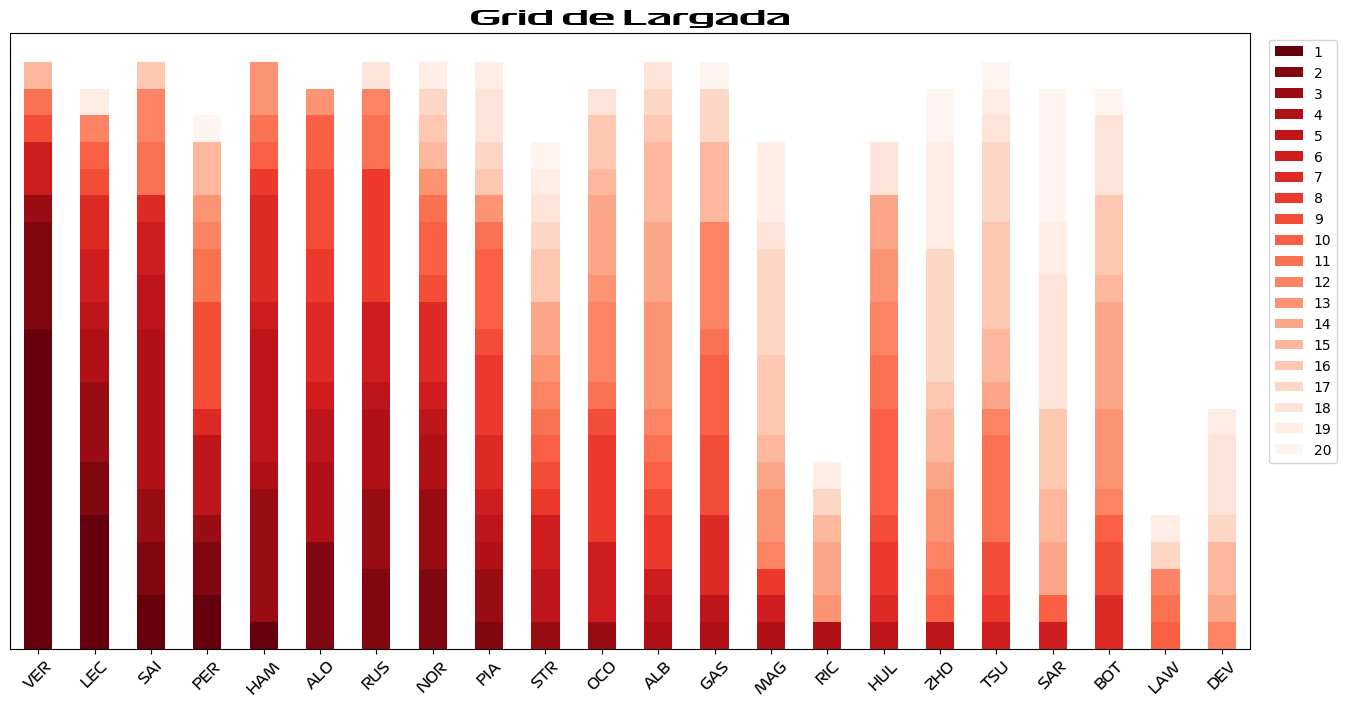

In [35]:
# plotando o gráfico de barras acumuladas

colors = plt.cm.Reds(np.linspace(1, 0, 20)) # definindo que as cores serão compostas por um degradê de vermelhos, sendo 1 o mais intenso e 20 o mais suave

grid_counts_largada.plot(kind='bar', stacked=True, figsize=(16, 8), color=colors)

plt.title('Grid de Largada', fontproperties=f1_bold, fontsize=14)
plt.xticks(rotation=45, fontproperties=f1_italic, fontsize=10)
plt.yticks([]) # eixo y sem descrição
plt.xlabel('') # eixo x sem nome
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=10) # legenda ao lado direito e centralizado

plt.show()

**Análise Gráfica**

É possível observar que o piloto Verstappen largou em primeiro lugar de forma majoritária. Algo diferente das análises anteriores, é que seu campanheiro de equipe não aparece em segundo lugar desta vez. A equipe Ferrari aparece com mais pole positions, porém como vimos anteriormente isso não afetou na pontuação dos pilotos e dos construtores.

Um ponto curioso a se observar é que, apesar do Devries ter corrido apenas para susbtiruir pilotos oficiais, o mesmo teve mais largadas no grid do que Riccardo, o piloto oficial da Alhpha Tauri.

# **MELHORES VOLTAS POR RACE**


In [36]:
# Utilizamos a base de resultados dos pilotos já construida anteriormente para esse estudo

# Filtrar pelo ano de 2023
laps_2023 = results_drivers_race[results_drivers_race['year'] == 2023]

In [37]:
# Excluindo todas as linhas que contêm '\N' na coluna 'fastestLapTime'
laps_2023 = laps_2023[laps_2023['fastestLapTime'] != '\\N']

In [38]:
# crinado função que modifica o formato de tempo para numérico, considerando qual é o total de segudos por volta
def time_to_seconds(time_str):
    if pd.isna(time_str):
        return 0
    try:
        minutes, seconds = time_str.split(':')
        return int(minutes) * 60 + float(seconds)
    except ValueError:
        return 0 # Retorna 0 se o formato não for válido

In [39]:
# Aplicar a função de conversão na coluna 'fastestLapTime'
laps_2023['fastestLapTime_seconds'] = laps_2023['fastestLapTime'].apply(time_to_seconds)

<ipython-input-39-768dd30e34e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps_2023['fastestLapTime_seconds'] = laps_2023['fastestLapTime'].apply(time_to_seconds)


In [40]:
# Selecionar as três voltas mais rápidas por raceId
fastest_laps = laps_2023.groupby('raceId').apply(lambda x: x.nsmallest(3, 'fastestLapTime_seconds'))
fastest_laps.head()

resultId  raceId  driverId  constructorId number_x  grid  \
raceId                                                                   
1098   25855     25861    1098       855             51       24    13   
       25848     25854    1098       842            214       10    20   
       25856     25862    1098       846              1        4    11   
1099   25861     25867    1099       830              9        1    15   
       25860     25866    1099       815              9       11     1   

             position positionText  positionOrder  points  ...  fp1_time  \
raceId                                                     ...             
1098   25855       16           16             16     0.0  ...  11:30:00   
       25848        9            9              9     2.0  ...  11:30:00   
       25856       17           17             17     0.0  ...  11:30:00   
1099   25861        2            2              2    19.0  ...  13:30:00   
       25860        1            1              1    25.0  ...  13:30:00   

                fp2_date  fp2_time    fp3_date  fp3_time  quali_date  \
raceId                                                                 
1098   25855  2023-03-03  15:00:00  2023-03-04  11:30:00  2023-03-04   
       25848  2023-03-03  15:00:00  2023-03-04  11:30:00  2023-03-04   
       25856  2023-03-03  15:00:00  2023-03-04  11:30:00  2023-03-04   
1099   25861  2023-03-17  17:00:00  2023-03-18  13:30:00  2023-03-18   
       25860  2023-03-17  17:00:00  2023-03-18  13:30:00  2023-03-18   

             quali_time  sprint_date sprint_time fastestLapTime_seconds  
raceId                                                                   
1098   25855   15:00:00           \N          \N                 93.996  
       25848   15:00:00           \N          \N                 95.068  
       25856   15:00:00           \N          \N                 95.822  
1099   25861   17:00:00           \N          \N                 91.906  
       25860   17:00:00           \N          \N                 92.188  

[5 rows x 44 columns]

In [41]:
# preparar base com as variáveis que serão utilizadas no estudo
fastest_laps_result = fastest_laps[['name', 'code', 'fastestLapTime', 'fastestLapTime_seconds']]

# resetar o index
fastest_laps_result.reset_index(drop=True, inplace=True)

# Exibir a base para verificação
fastest_laps_result.head()

,name,code,fastestLapTime,fastestLapTime_seconds
0,Bahrain Grand Prix,ZHO,1:33.996,93.996
1,Bahrain Grand Prix,GAS,1:35.068,95.068
2,Bahrain Grand Prix,NOR,1:35.822,95.822
3,Saudi Arabian Grand Prix,VER,1:31.906,91.906
4,Saudi Arabian Grand Prix,PER,1:32.188,92.188


In [42]:
# Adicionando uma coluna de cores baseadas no color map
fastest_laps_result['color'] = fastest_laps_result['code'].map(driver_color_map)

<ipython-input-42-b41df4bb4736>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fastest_laps_result['color'] = fastest_laps_result['code'].map(driver_color_map)


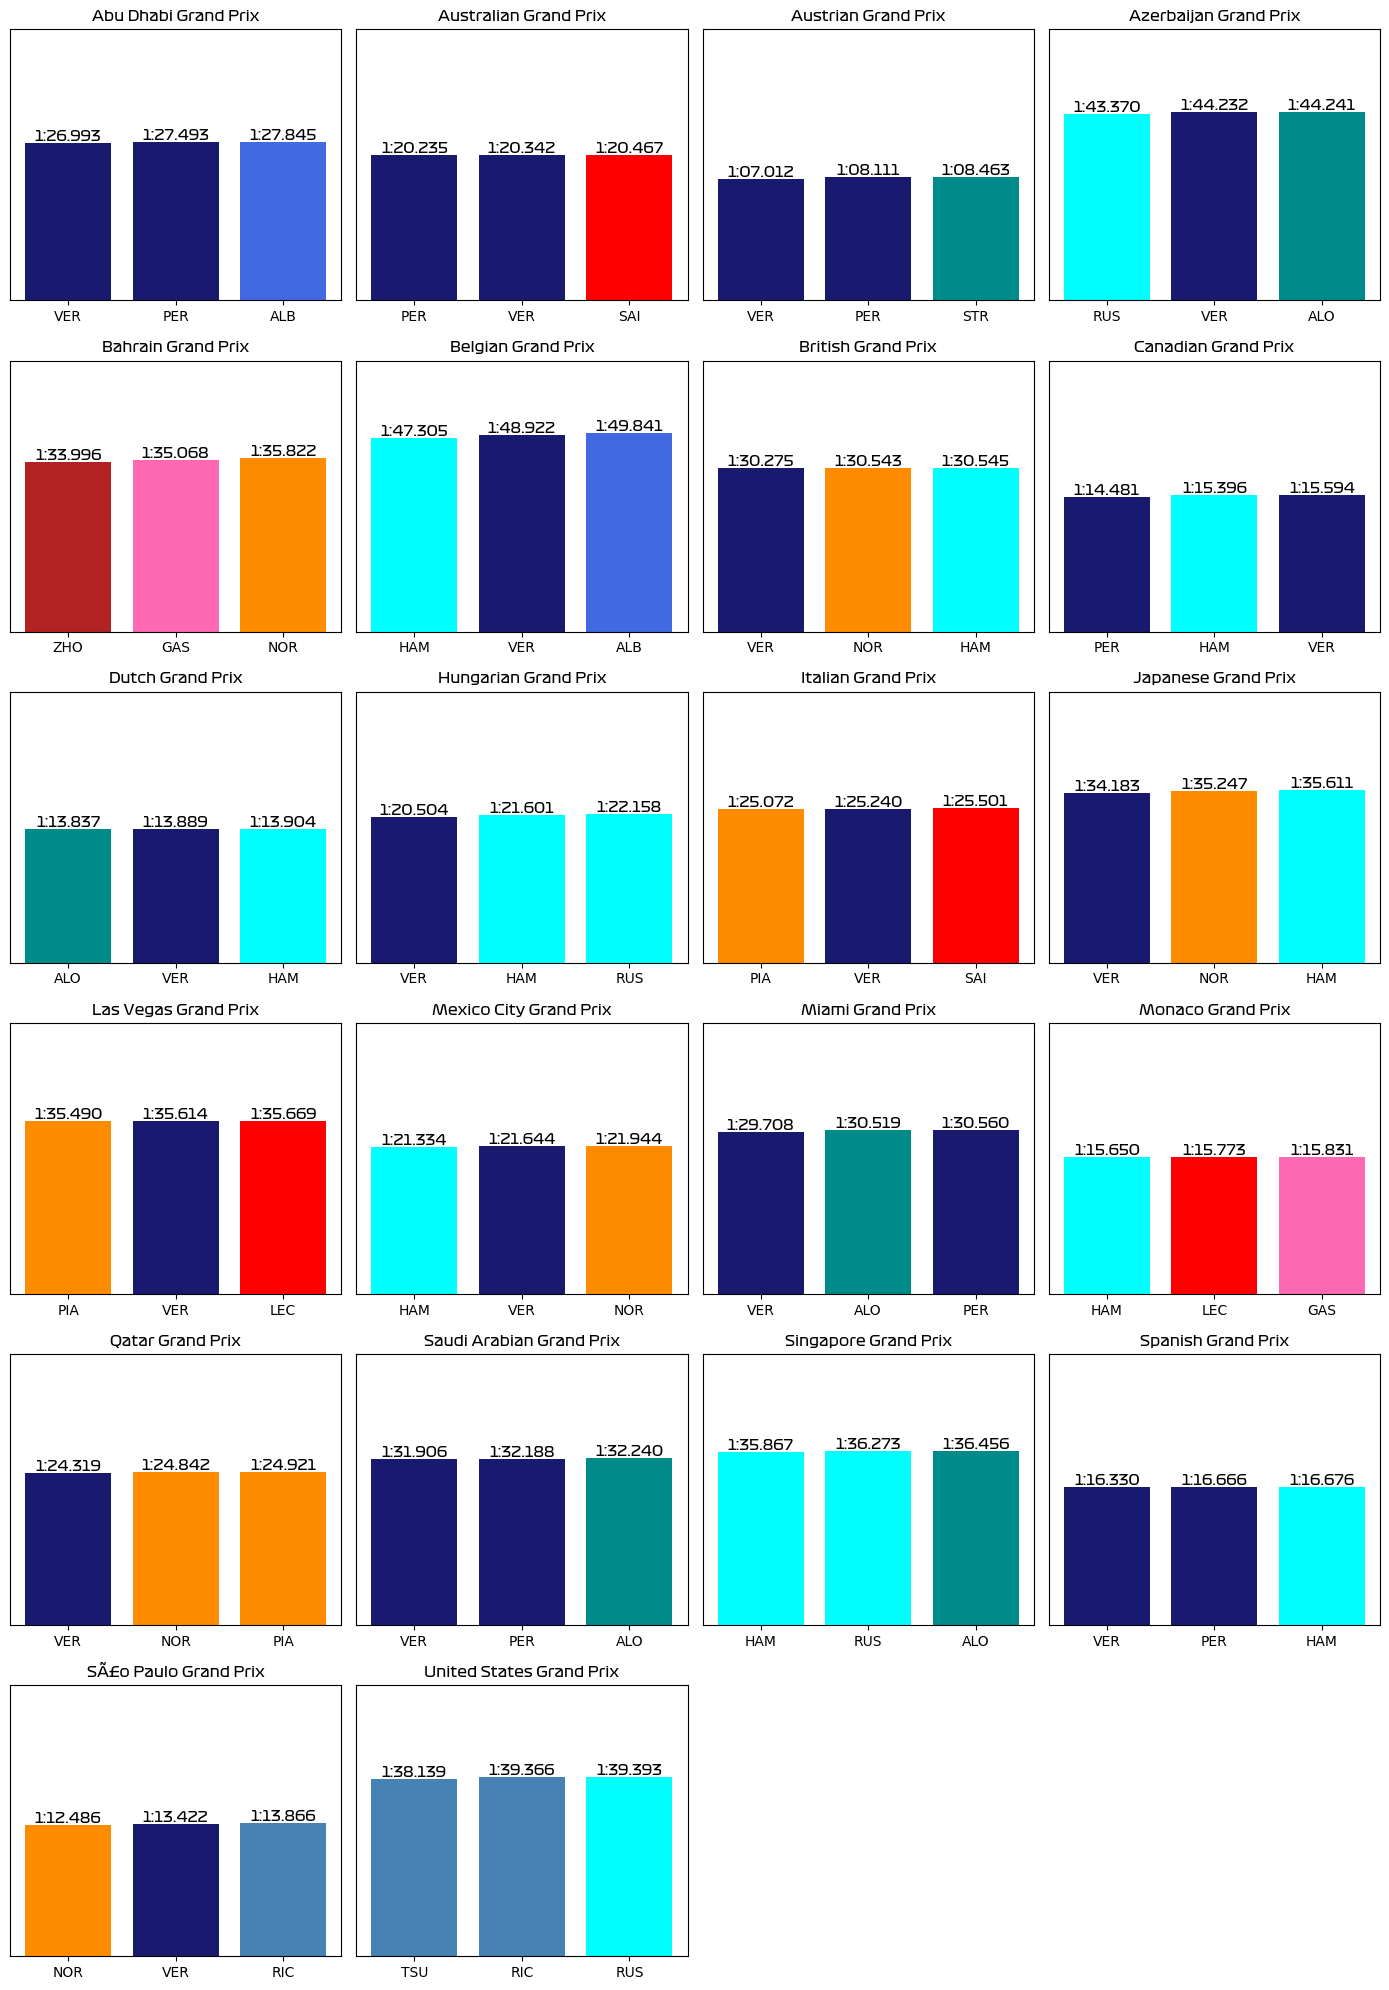

In [43]:
# Plotando o gráfico de barras para as três melhores voltas

import matplotlib.pyplot as plt

# Preparar a plotagem
num_plots = len(fastest_laps_result['name'].unique())
num_cols = 4
num_rows = (num_plots // num_cols) + 1 # definindo como será a disposição dos gráficos de acordo com a quantidade de races

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, 20))

#  transformar um array multidimensional de eixos em um array unidimensional
axes = axes.flatten()

# Plotar os dados
for i, (race_id, data) in enumerate(fastest_laps_result.groupby('name')):
    ax = axes[i]
    bar_laps = ax.bar(data['code'], data['fastestLapTime_seconds'], color=data['color'])
    ax.set_title(f'{race_id}', fontsize=12, fontproperties=f1_italic)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(0, 150)  # Definir os mesmos limites do eixo y para todos os gráficos
    ax.yaxis.set_ticks([])  # Remover as marcas do eixo y

    # Adicionar rótulos de valor nas barras com o valor do tempo sem a transformação para segundos
    for bar, fastestLapTime in zip(bar_laps, data['fastestLapTime']):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{fastestLapTime}', ha='center', va='bottom', fontproperties=f1_italic, fontsize=10)

# Remover eixos extras
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Análise Gráfica**

É possível observar a explêndida performance da Red Bull quando observamos as voltas mais rápidas. A equipe aparece em praticamente todos GPs com exceção do Bahrain, Monaco, Singapore e United States.

É interessante observar que as voltas mais rápida aconteceram nos circuitos de Austrian (VER - 1:07:012) e São Paulo (NOR - 1:12:486), principalmente devido a extensão de quilometragem de pista.
Já por outro lado, observamos que as voltas mais demoradas foram nos circuitos de Belgian (HAM - 1:47:305) e Azerbaijan (RUS - 1:43:370), principalmente devido a pista molhada que faz com que os pilotos utilizem pneus de chuva, tornando as voltas mais lentas.

# **CORRELAÇÃO**

In [44]:
# Junção das bases
results_total = pd.merge(results, constructor_results, on='constructorId', suffixes=('_driver', '_constructor'), how='left')
results_total_race = pd.merge(results_total, races, left_on='raceId_driver', right_on='raceId', suffixes=('', '_race'), how='left')
results_total_race.head()

# FINALIDADE: trazer nome dos pilotos, construtores e trazer os anos das temporadas

,resultId,raceId_driver,driverId,constructorId,number,grid,position,positionText,positionOrder,points_driver,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [45]:
# Verificando nomes das colunas contidas na tabela criada
results_total_race.columns

Index(['resultId', 'raceId_driver', 'driverId', 'constructorId', 'number',
       'grid', 'position', 'positionText', 'positionOrder', 'points_driver',
       'laps', 'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'constructorResultsId',
       'raceId_constructor', 'points_constructor', 'status', 'raceId', 'year',
       'round', 'circuitId', 'name', 'date', 'time_race', 'url', 'fp1_date',
       'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

In [46]:
# Filtrando pelo ano 2023
results_total_2023 = results_total_race[results_total_race['year'] == 2023]

# Selecionar apenas as colunas de interesse
results_total_2023 = results_total_2023[['raceId_driver','raceId_constructor', 'points_driver', 'points_constructor', 'grid', 'fastestLapTime']]

In [47]:
# Aplicar a função de conversão de tempo na coluna 'fastestLapTime'
results_total_2023['fastestLapTime_seconds'] = results_total_2023['fastestLapTime'].apply(time_to_seconds)

# Selecionar apenas as colunas de interesse
results_total_final = results_total_2023[['points_driver', 'points_constructor', 'grid','fastestLapTime_seconds']]
results_total_final.head()

,points_driver,points_constructor,grid,fastestLapTime_seconds
9441688,25.0,0.0,1,96.236
9441689,25.0,2.0,1,96.236
9441690,25.0,2.0,1,96.236
9441691,25.0,4.0,1,96.236
9441692,25.0,2.0,1,96.236


retirar fastestLapTime_seconds zeradas
sum dos pontos por raceid

In [48]:
# Describe na base criada, transpondo as variáveis para linhas para melhor visualização
results_total_final.describe(include = 'all').transpose()

,count,mean,std,min,25%,50%,75%,max
points_driver,179564.0,6.065280,7.452670,0.0,0.000,2.000,10.000,26.000
points_constructor,179564.0,9.091399,11.143236,0.0,0.000,5.000,13.000,66.000
grid,179564.0,8.937972,5.894593,0.0,4.000,8.000,14.000,20.000
fastestLapTime_seconds,179564.0,84.811278,20.340323,0.0,77.513,86.666,96.328,122.755


In [49]:
# Definindo a correlação
corr = results_total_final.corr()

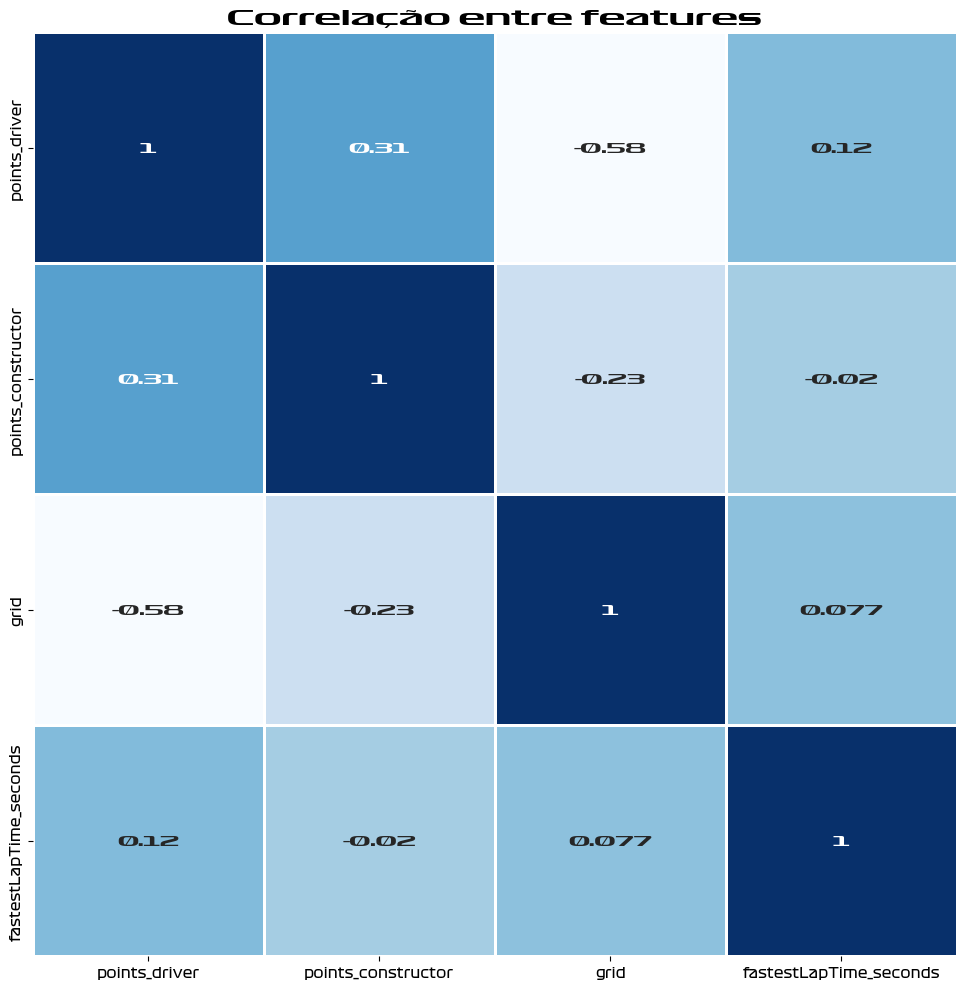

In [50]:
# Plotando o gráfico de mapa de calor

plt.figure(figsize=(10, 10))

plt.title('Correlação entre features', fontproperties=f1_bold, fontsize=14, loc='center')
plt.xticks(fontproperties=f1_italic, fontsize=10)
plt.yticks(fontproperties=f1_italic, fontsize=10)
sns.heatmap(corr,
            cmap='Blues',
            annot=True,
            linewidths=2,
            annot_kws={"fontproperties": f1_bold},
            square=True,
            cbar=False  # Removendo a legenda (barra de cores)
           )

plt.tight_layout()  # Para garantir que tudo esteja centralizado e sem excessos de espaço
plt.show()

**Análise Gráfica**

* Correlação dos pontos dos pilotos com os pontos dos construtores é de **31%**

Por mais que, quanto mais um piloto pontua, mais a equipe pontua junto, isso não se torna motivo para ter alta correlação. O estudo apresenta uma correlação baixa porque pode ser que um piloto pontuou sozinho durante toda uma temporada.
Portanto, concluimos que, o ponto das equipes tem correlação com o ponto dos pilotos considerenado a lógica matemática, mas, o ponto do piloto não tem correlação com o ponto da equipe.


* Correlação dos pontos com o grid de largada é de **-57%**

A correlação é boa e explica que quanto menor seu grid de largada maior será sua pontuação ao final de cada corrida.


* Correlação dos pontos com a volta mais rápida é de **12%**

Não existe correlação alguma da volta mais rápida com a pontuação dos pilotos devido ao fato de que um piloto que não entrou no ranking de pontuaçao naquele GP possa ter feito a volta mais rápida no dia.
